## Business Objective 

The business objective of this project is to compare Facebook Ads and Google AdWords to identify which platform delivers higher conversions and better return on investment, so the company can decide where to allocate more marketing budget.

In [4]:
# importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
df = pd.read_csv("marketing_campaign_2025.csv")

In [22]:
df.head()

,Date,FB_Views,FB_Clicks,FB_Conversions,FB_Cost,Adwords_Views,Adwords_Clicks,Adwords_Conversions,Adwords_Cost,FB_CTR (%),FB_Conv_Rate (%),Adwords_CTR (%),Adwords_Conv_Rate (%)
0,2025-01-01,902,87,15,22.64,1431,31,2,50.25,9.65,17.24,2.17,6.45
1,2025-01-02,1235,78,8,24.16,1704,53,9,29.94,6.32,10.26,3.11,16.98
2,2025-01-03,1070,68,13,20.08,1948,37,2,32.42,6.36,19.12,1.90,5.41
3,2025-01-04,906,81,12,23.50,1974,40,4,53.66,8.94,14.81,2.03,10.00
4,2025-01-05,871,94,13,34.19,1584,42,5,36.29,10.79,13.83,2.65,11.90


In [23]:
df.Date = pd.to_datetime(df["Date"])

In [27]:
df.columns = df.columns.str.lower()

In [28]:
df.describe()

,date,fb_views,fb_clicks,fb_conversions,fb_cost,adwords_views,adwords_clicks,adwords_conversions,adwords_cost,fb_ctr (%),fb_conv_rate (%),adwords_ctr (%),adwords_conv_rate (%)
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2025-07-01 23:59:59.999999744,1153.005479,70.408219,13.295890,35.423425,1513.695890,54.578082,5.457534,42.036932,6.326466,20.121096,3.754658,10.883205
min,2025-01-01 00:00:00,801.000000,40.000000,8.000000,20.010000,1002.000000,30.000000,2.000000,25.010000,2.710000,8.250000,1.550000,2.530000
25%,2025-04-02 00:00:00,980.000000,56.000000,10.000000,28.910000,1261.000000,41.000000,3.000000,32.740000,4.800000,14.140000,2.800000,6.490000
50%,2025-07-02 00:00:00,1158.000000,70.000000,13.000000,35.830000,1520.000000,54.000000,5.000000,42.030000,6.070000,19.050000,3.510000,10.000000
75%,2025-10-01 00:00:00,1315.000000,86.000000,16.000000,42.380000,1772.000000,67.000000,7.000000,51.120000,7.630000,24.290000,4.410000,14.290000
max,2025-12-31 00:00:00,1499.000000,99.000000,19.000000,49.980000,1997.000000,79.000000,9.000000,59.730000,12.180000,46.340000,7.750000,30.000000
std,NaN,204.453721,17.247724,3.463326,8.372593,296.618299,14.692173,2.238887,10.291816,2.022052,7.540399,1.321539,5.658352


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   365 non-null    datetime64[ns]
 1   fb_views               365 non-null    int64         
 2   fb_clicks              365 non-null    int64         
 3   fb_conversions         365 non-null    int64         
 4   fb_cost                365 non-null    float64       
 5   adwords_views          365 non-null    int64         
 6   adwords_clicks         365 non-null    int64         
 7   adwords_conversions    365 non-null    int64         
 8   adwords_cost           365 non-null    float64       
 9   fb_ctr (%)             365 non-null    float64       
 10  fb_conv_rate (%)       365 non-null    float64       
 11  adwords_ctr (%)        365 non-null    float64       
 12  adwords_conv_rate (%)  365 non-null    float64       
dtypes: da

### Comparing performances with histplots

<Axes: title={'center': 'Adwords Conversions'}, xlabel='adwords_conversions', ylabel='Count'>

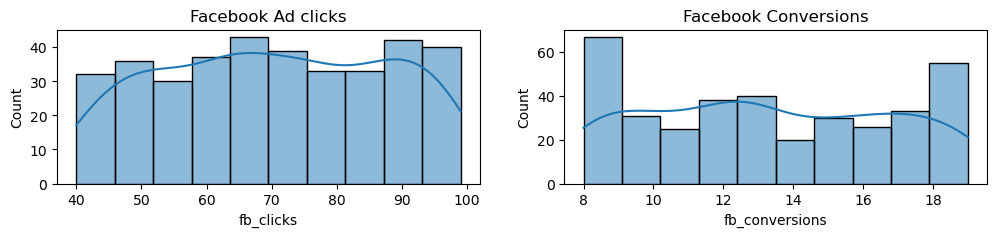

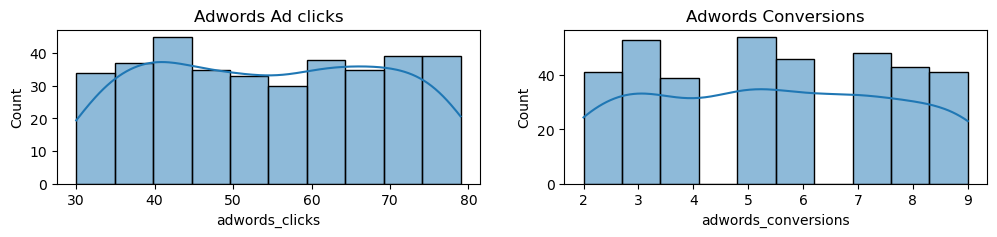

In [42]:
plt.figure(figsize=(12,2))
plt.subplot(1, 2, 1)
plt.title("Facebook Ad clicks")
sns.histplot(df["fb_clicks"], kde = True)


plt.subplot(1, 2, 2)
plt.title("Facebook Conversions")
sns.histplot(df["fb_conversions"], kde = True)

plt.figure(figsize=(12,2))
plt.subplot(1, 2, 1)
plt.title("Adwords Ad clicks")
sns.histplot(df["adwords_clicks"], kde = True)


plt.subplot(1, 2, 2)
plt.title("Adwords Conversions")
sns.histplot(df["adwords_conversions"], kde = True)

## Checking for high and low number of counts 

In [45]:
def classify(col):
    cat = []
    for i in df[col]:
        if  i <= 5:
            cat.append('0 - 5')
        elif 5 < i <= 10:
            cat.append('6 - 10')
        elif 10 < i <= 15:
            cat.append('11 - 15')
        else:
            cat.append('6 - 10')
    return cat

df["fb conversion category"] = classify("fb_conversions")
df["adwords conversion category"] = classify("adwords_conversions")


In [48]:
df.head()

,date,fb_views,fb_clicks,fb_conversions,fb_cost,adwords_views,adwords_clicks,adwords_conversions,adwords_cost,fb_ctr (%),fb_conv_rate (%),adwords_ctr (%),adwords_conv_rate (%),fb conversion category,adwords conversion category
0,2025-01-01,902,87,15,22.64,1431,31,2,50.25,9.65,17.24,2.17,6.45,11 - 15,0 - 5
1,2025-01-02,1235,78,8,24.16,1704,53,9,29.94,6.32,10.26,3.11,16.98,6 - 10,6 - 10
2,2025-01-03,1070,68,13,20.08,1948,37,2,32.42,6.36,19.12,1.90,5.41,11 - 15,0 - 5
3,2025-01-04,906,81,12,23.50,1974,40,4,53.66,8.94,14.81,2.03,10.00,11 - 15,0 - 5
4,2025-01-05,871,94,13,34.19,1584,42,5,36.29,10.79,13.83,2.65,11.90,11 - 15,0 - 5


In [49]:
df['fb conversion category'].value_counts()

fb conversion category
6 - 10     212
11 - 15    153
Name: count, dtype: int64

In [67]:
fb = pd.DataFrame(df['fb conversion category'].value_counts().reset_index(), ).rename(columns={'fb conversion category':'category','count':'fb count'})

In [68]:
adw = pd.DataFrame(df['adwords conversion category'].value_counts().reset_index(), ).rename(columns={'adwords conversion category':'category','count':'adwords count'})

In [71]:
cat_df = pd.merge(fb, adw, how='outer', on='category').fillna(0)
cat_df

,category,fb count,adwords count
0,0 - 5,0.0,187.0
1,11 - 15,153.0,0.0
2,6 - 10,212.0,178.0


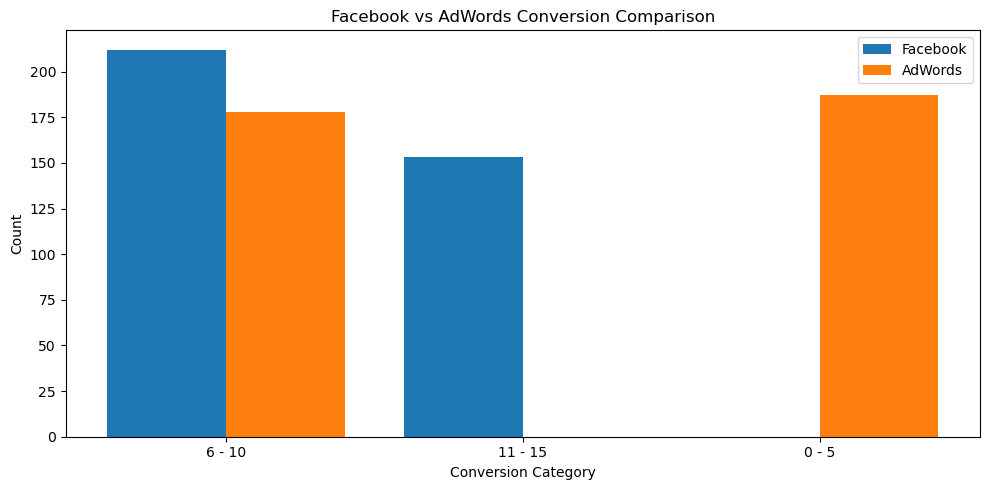

In [84]:
cat_df = cat_df.iloc[[0,2,1]]

x = np.arange(len(cat_df))
width = 0.4

plt.figure(figsize=(10,5))

plt.bar(x - width/2, cat_df['fb count'], width, label='Facebook')
plt.bar(x + width/2, cat_df['adwords count'], width, label='AdWords')

plt.xticks(x, cat_df['category'])
plt.xlabel('Conversion Category')
plt.ylabel('Count')
plt.title('Facebook vs AdWords Conversion Comparison')
plt.legend()

plt.tight_layout()
plt.show()

- The facebook has more ad conversion days than adwords in top categories
- Adwords has no conversion in '11 - 15' category indicating somwthing is influceing that effect

## Do more clicks on the ad really lead to more sales?

<Axes: title={'center': 'Adwords '}, xlabel='adwords_clicks', ylabel='adwords_conversions'>

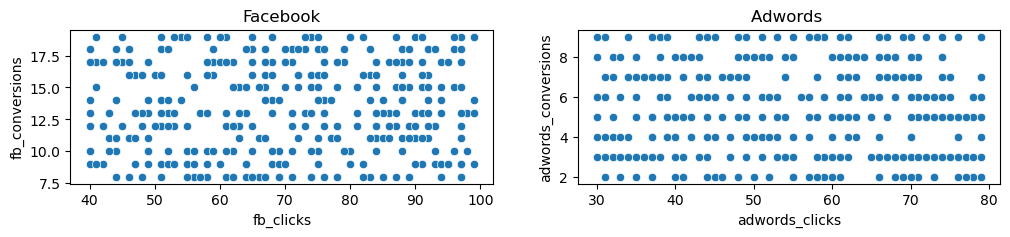

In [91]:
plt.figure(figsize=(12,2))
plt.subplot(1, 2, 1)
plt.title("Facebook")
sns.scatterplot(x=df['fb_clicks'], y=df['fb_conversions'])



plt.subplot(1, 2, 2)
plt.title("Adwords ")
sns.scatterplot(x=df['adwords_clicks'], y=df['adwords_conversions'])




In [97]:
fb_corr = df[['fb_conversions', 'fb_clicks']].corr()
fb_corr

,fb_conversions,fb_clicks
fb_conversions,1.000000,0.039134
fb_clicks,0.039134,1.000000


In [101]:
adw_corr = df[['adwords_clicks', 'adwords_conversions']].corr()
adw_corr

,adwords_clicks,adwords_conversions
adwords_clicks,1.000000,-0.053079
adwords_conversions,-0.053079,1.000000


In [112]:
print(f"fb corr: {round(fb_corr.values[0,1],2)}")
print(f"adw corr: {round(adw_corr.values[0,1],2)}")

fb corr: 0.04
adw corr: -0.05


The correlation between clicks and conversions is very weak for both platforms, which indicates that increasing clicks does not significantly improve conversions. The company should focus on improving targeting, ad quality, and landing page optimization instead of just driving more traffic.

## Is there a significant difference between Facebook and AdWords conversions?
## Hypothesis testing 

### Null Hypothesis (H₀):
There is no significant difference in mean conversions between Facebook and AdWords.

### Alternative Hypothesis (H₁):
There is a significant difference in mean conversions between the two platforms.

In [115]:
t_stat, p_value = stats.ttest_ind(
    df['fb_conversions'],
    df['adwords_conversions']
)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-Statistic: 36.31236176080648
P-Value: 1.467694425279385e-165

Reject the null hypothesis


In [116]:
print("Facebook Mean Conversions:", df['fb_conversions'].mean())
print("AdWords Mean Conversions:", df['adwords_conversions'].mean())

Facebook Mean Conversions: 13.295890410958904
AdWords Mean Conversions: 5.457534246575342


In [117]:
mean_diff = df['fb_conversions'].mean() - df['adwords_conversions'].mean()
print("Mean Difference:", mean_diff)

Mean Difference: 7.838356164383562


Facebook generates significantly higher average conversions than AdWords, and the hypothesis test confirms that this difference is statistically significant. Therefore, the company should consider allocating more budget toward Facebook campaigns.

## Regression Analysis


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [121]:
X_fb = df[['fb_clicks']]
y_fb = df['fb_conversions']

model_fb = LinearRegression()
model_fb.fit(X_fb, y_fb)

pred_fb = model_fb.predict(X_fb)

print("FB R2 Score:", r2_score(y_fb, pred_fb) * 100)
print("FB MSE:", mean_squared_error(y_fb, pred_fb))

FB R2 Score: 0.15314983988162778
FB MSE: 11.943444510885012


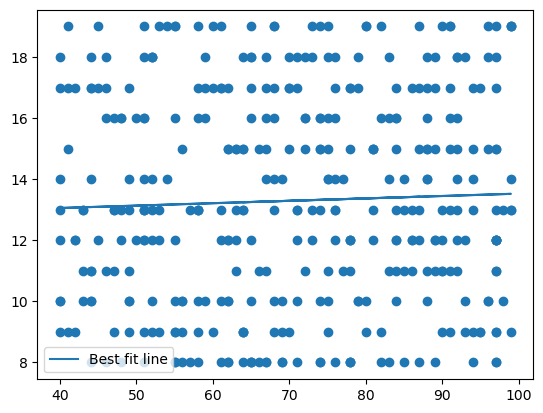

In [125]:
plt.scatter(X_fb, y_fb)
plt.plot(X_fb, pred_fb, label = "Best fit line", )
plt.legend()
plt.show()


In [127]:
# Predict for 50 and 80 clicks
new_clicks = pd.DataFrame({'fb_clicks': [50, 80]})
predictions = model_fb.predict(new_clicks)

print("Expected conversions for 50 clicks:", predictions[0])
print("Expected conversions for 80 clicks:", predictions[1])

Expected conversions for 50 clicks: 13.135519745052365
Expected conversions for 80 clicks: 13.371263978060368


The regression results show that increasing clicks does not significantly increase conversions. This indicates that traffic quality or targeting strategy may be ineffective, and simply driving more clicks will not improve campaign performance